# Box Plot 

A Box plot is also known as a box and whisker plot. A box plot uses boxes and lines to show the distribution of one or more groups or categories of data. A box plot divides a dataset into 4 equal parts and shows a five-number summary. 

- Minimum - This shows the minimum value of the dataset excluding outliers.
- First quartile (Q1) - 25% of the data lies below Q1.
- Median (Q2) - The Q2 is the median of a dataset. It divides the data into two parts. 50% of the data lies below it and 50% above it.
- Third quartile (Q3) - 75% of the data lies below Q3.
- Maximum - This shows the maximum value of a dataset excluding outliers.


# Create a Box Plot 

To create a Box plot in matplotlib, we use the [`plt.boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) function. Let's read the Framingham heart study data. 

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
framingham = pd.read_csv('../data/framingham.csv')
framingham.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,No,0.0,No,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,2.0,No,0.0,No,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1.0,Yes,20.0,No,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,3.0,Yes,30.0,No,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Female,46,3.0,Yes,23.0,No,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,No


We will create a Box plot of Systolic Blood Pressure.

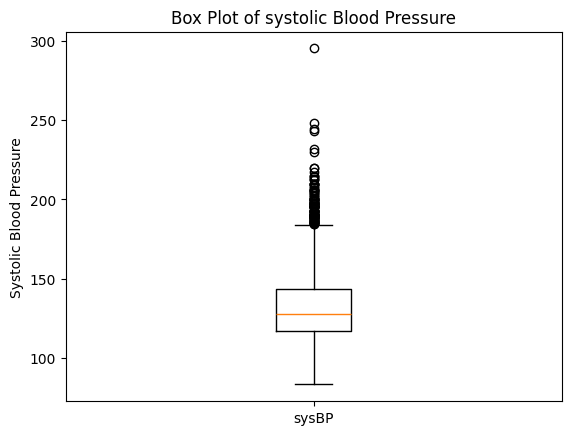

In [2]:
# box plot of systolic Blood pressure
plt.boxplot(framingham['sysBP'], labels=['sysBP'])
plt.title('Box Plot of systolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
plt.savefig("../images/box02.png")
plt.show()

## Multiple Box Plots

You can also create multiple box plots for comparison. Let's plot `sysBP` and `diaBP` together on the same plot side by side. Doing this will allow us to compare these two distributions directly.

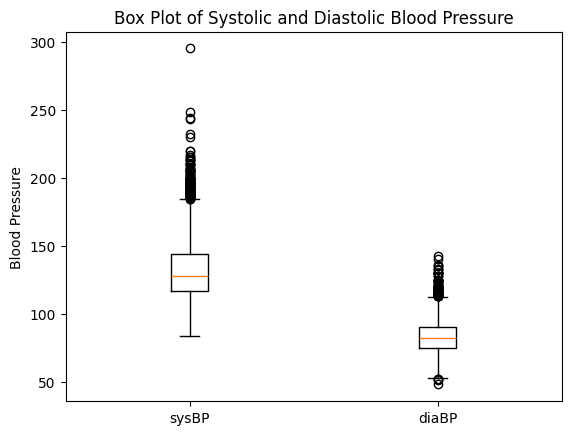

In [3]:
# multiple box plots
plt.boxplot([framingham["sysBP"], framingham["diaBP"]], labels=["sysBP", "diaBP"])

plt.title("Box Plot of Systolic and Diastolic Blood Pressure")
plt.ylabel("Blood Pressure")
plt.savefig("../images/box03.png")
plt.show()


If you look carefully, you can see that I passed the `sysBP and diaBP` inside a list instead of separate arguments to the `plt.boxplot()` function. If you pass two arguments then the box plot will throw an error. Each element of the list corresponds to a different box plot, and `labels` are used to label each plot accordingly.

## Adding Colors to Box Plots

You can add colors to each box using the `patch_artist` and `facecolor`. By default, the `patch_artist=False`, meaning that the boxes are dawn using line plots and are not filled with color.

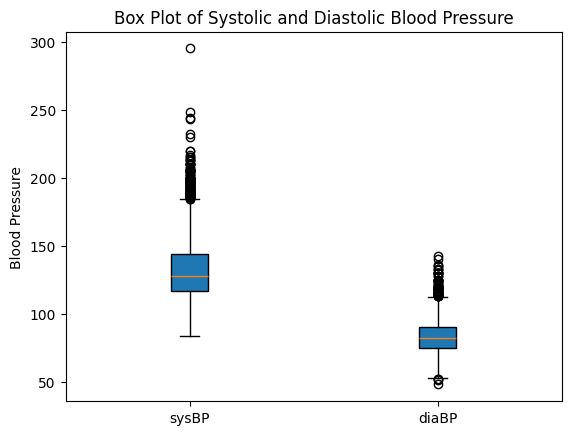

In [4]:
# colored box plot
plt.boxplot(
    [framingham["sysBP"], framingham["diaBP"]],
    labels=["sysBP", "diaBP"],
    patch_artist=True,
)

plt.title("Box Plot of Systolic and Diastolic Blood Pressure")
plt.ylabel("Blood Pressure")
plt.savefig("../images/box04.png")
plt.show()

To add different colors to each box, we need to modify our code a bit, as the `plt.boxplot()` function does not provide a direct method. We first have to access individual boxes and then apply colors to them.

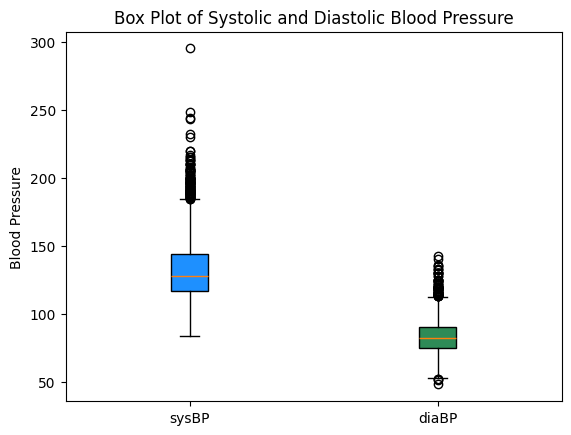

In [5]:
# Box plots with different colors
bp = plt.boxplot(
    [framingham["sysBP"], framingham["diaBP"]],
    labels=["sysBP", "diaBP"],
    patch_artist=True,
)

# Set colors for each box plot
colors = ["dodgerblue", "seagreen"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Box Plot of Systolic and Diastolic Blood Pressure")
plt.ylabel("Blood Pressure")
plt.savefig("../images/box05.png")
plt.show()

## Notched Box Plot

Use the `notch` to create a notched box plot. The `notch` represents the confidence interval (CI) around the median. By default, it is `False`, which means it will create a rectangular box plot.

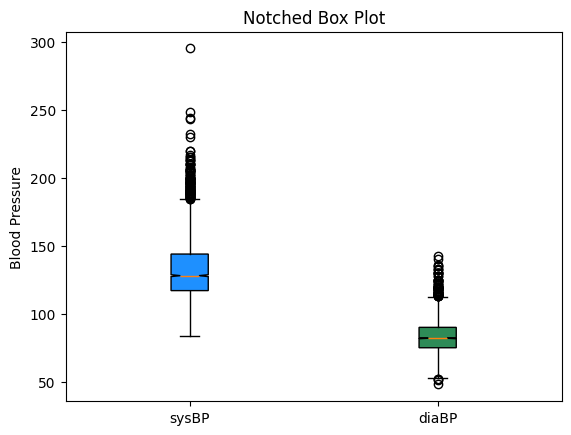

In [6]:
# notched box plot
bp = plt.boxplot(
    [framingham["sysBP"], framingham["diaBP"]],
    labels=["sysBP", "diaBP"],
    patch_artist=True,
    notch=True,
)

# Set colors for each box plot
colors = ["dodgerblue", "seagreen"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Notched Box Plot")
plt.ylabel("Blood Pressure")
plt.savefig("../images/box06.png")
plt.show()

## Outliers

When you create a Box plot, the outliers are represented by small circles by default. Use the `flierprops` to change the symbol or marker used for outliers. You can also change the color (`markerfacecolor`), edge color (`markeredgecolor`), and marker size (`markersize`).

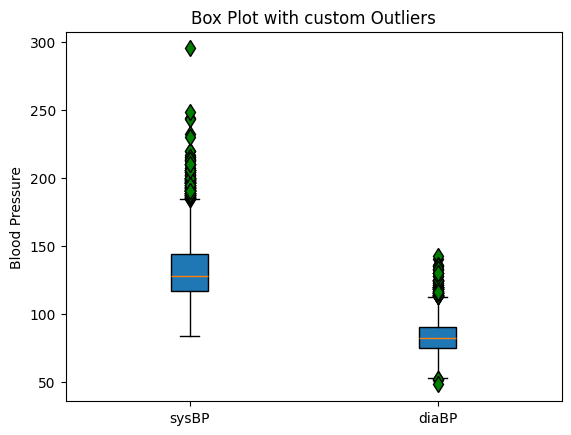

In [7]:
# outliers properties
flierprops = dict(
    marker="d",  # diamond shape
    markerfacecolor="green",  # green fill
    markeredgecolor="black",  # Black edge color
    markersize=8,
)  # Size of the marker

# Box plot with custom outlier symbols
plt.boxplot(
    [framingham["sysBP"], framingham["diaBP"]],
    labels=["sysBP", "diaBP"],
    flierprops=flierprops,
    patch_artist=True,
)

plt.title("Box Plot with custom Outliers")
plt.ylabel("Blood Pressure")
plt.savefig("../images/box07.png")
plt.show()

## Remove Outliers
To remove the outliers set `showfliers=False`. By default, it is set to `True`, which means outliers(fliers) are shown.

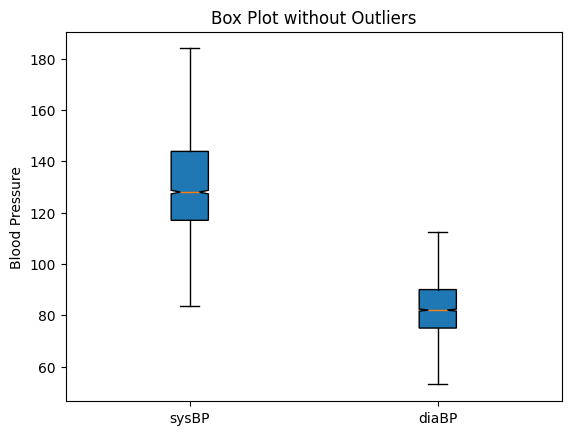

In [8]:
# Box plot without outliers
plt.boxplot(
    [framingham["sysBP"], framingham["diaBP"]],
    labels=["sysBP", "diaBP"],
    showfliers=False,
    patch_artist=True,
    notch=True,
)

plt.title("Box Plot without Outliers")
plt.ylabel("Blood Pressure")
plt.savefig("../images/box08.png")
plt.show()

## Horizontal Box Plot 

To create Horizontal Box Plot in matplotlib, set `vert=False`. By default, box plots are vertical (`vert=true`).

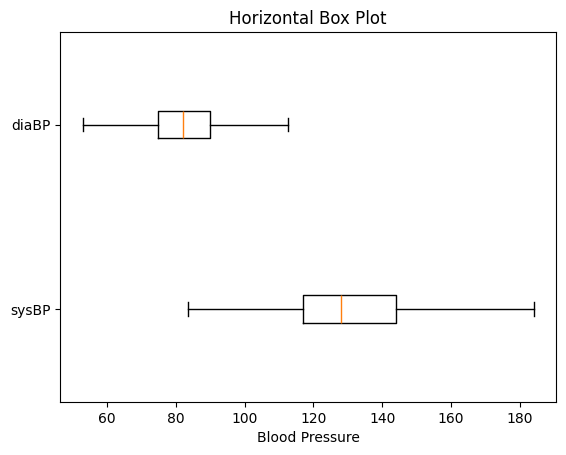

In [9]:
# Horizontal Box plot
plt.boxplot(
    [framingham["sysBP"], framingham["diaBP"]],
    labels=["sysBP", "diaBP"],
    vert=False,
    showfliers=False,
)

plt.title("Horizontal Box Plot")
plt.xlabel("Blood Pressure")
plt.savefig("../images/box09.png")
plt.show()

Rather than creating multiple box plots for separate variables such as `sysBP` and `diaBP`, we can consolidate our analysis into a single variable, such as `BMI`, then categorize it by gender for comparative multiple box plots.

Let's see an example of this.

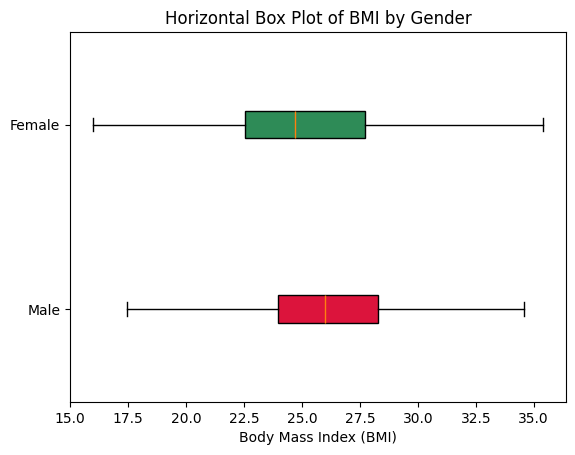

In [10]:
male_df = framingham[framingham["sex"] == "Male"]
female_df = framingham[framingham["sex"] == "Female"]

# Horizontal Box plot
bp = plt.boxplot(
    [male_df["BMI"], female_df["BMI"]],
    labels=["Male", "Female"],
    vert=False,
    showfliers=False,
    patch_artist=True,
)

# Set colors for each box plot
colors = ["crimson", "seagreen"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Horizontal Box Plot of BMI by Gender")
plt.xlabel("Body Mass Index (BMI)")
plt.savefig("../images/box10.png")
plt.show()

## Exercise 6.1

1. Read the `marriage-age-2016.txt` in pandas with sep='\t' parameter.
2. Create a new column `age_diff` with the difference in age between men and women.
3. Create a Box Plot of the `age_diff` column.
4. Create Multiple Box Plot of Men and Women's age at Marriage.
5. Add different colors to each box plot.
6. Turn the plot to a notched box plot.
7. Tuen the same plot into a Horizontal Box Plot.

# Solution

### Exercise 6.1

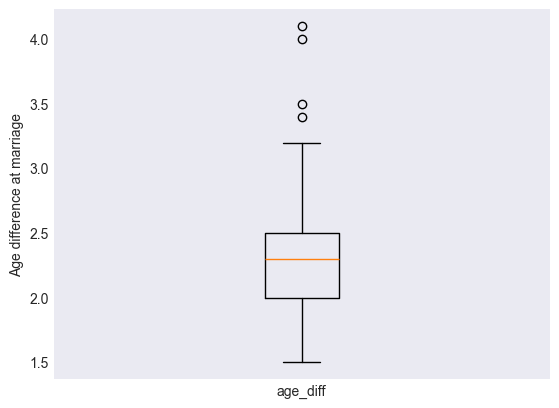

In [11]:
# ignore warnings
import warnings

warnings.filterwarnings("ignore")

# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the `marriage-age-2016.txt` in pandas
marriage = pd.read_csv("../data/marriage-age-2016.txt", sep="\t")

# Create a new column age_diff
marriage["age_diff"] = marriage["Men"] - marriage["Women"]

# Create a Box Plot of age_diff column
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-dark")

plt.boxplot(marriage["age_diff"], labels=["age_diff"])
plt.ylabel("Age difference at marriage")
plt.savefig("../images/box11.png")
plt.show()

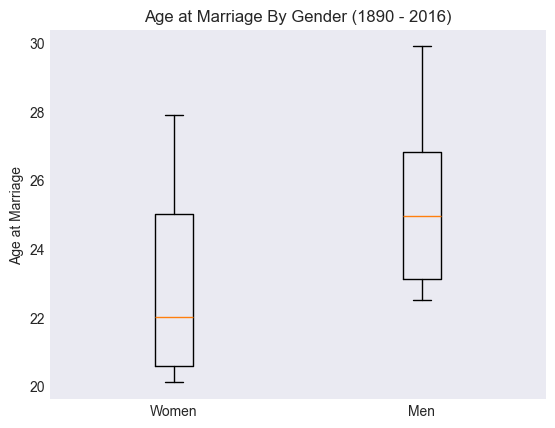

In [13]:
# multiple box plot of Men and Women age at marriage.
plt.boxplot([marriage["Women"], marriage["Men"]], labels=["Women", "Men"])

plt.title("Age at Marriage By Gender (1890 - 2016)")
plt.ylabel("Age at Marriage")
plt.savefig("../images/box12.png")
plt.show()

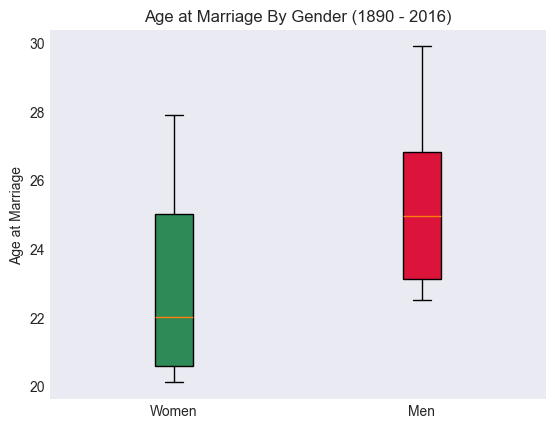

In [14]:
# Add different colors to each box plot.
bp = plt.boxplot(
    [marriage["Women"], marriage["Men"]], labels=["Women", "Men"], patch_artist=True
)

# Set colors for each box plot
colors = ["seagreen", "crimson"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Age at Marriage By Gender (1890 - 2016)")
plt.ylabel("Age at Marriage")
plt.savefig("../images/box13.png")
plt.show()

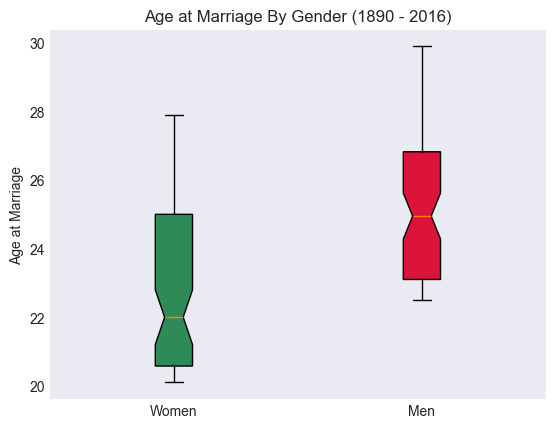

In [15]:
# Turn the plot to a notched box plot.
bp = plt.boxplot(
    [marriage["Women"], marriage["Men"]],
    notch=True,
    labels=["Women", "Men"],
    patch_artist=True,
)

# Set colors for each box plot
colors = ["seagreen", "crimson"]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Age at Marriage By Gender (1890 - 2016)")
plt.ylabel("Age at Marriage")
plt.savefig("../images/box14.png")
plt.show()

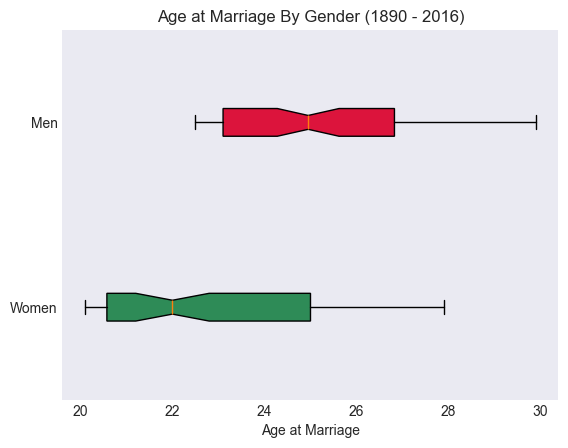

In [42]:
# Turn the same plot to a horizontal box plot.
bp = plt.boxplot([marriage['Women'], marriage['Men']], 
                 notch=True, vert=False, 
                 labels=['Women', 'Men'], 
                 patch_artist=True)

# Set colors for each box plot
colors = ['seagreen', 'crimson'] 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title("Age at Marriage By Gender (1890 - 2016)")
plt.xlabel("Age at Marriage")
plt.savefig("../images/box15.png")
plt.show()